In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

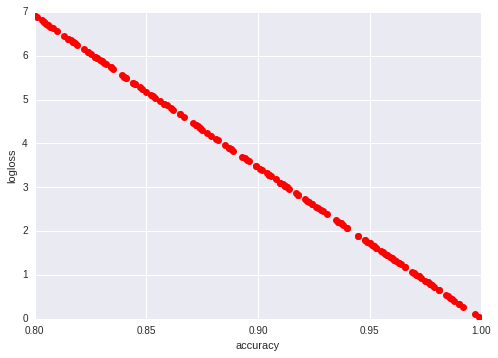

In [136]:
# просто график зависимости logloss от accuracy на наборах случайных данных
# не имеет отношения к тому, что выше или ниже

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

larray, aarray = [], []
ASIZE = 1000

for i in range(1000):
    #y = np.random.randint(0, 2, (ASIZE))
    #out = np.random.randint(0, 2, (ASIZE))
    
    k = np.random.randint(0, ASIZE)
    y = np.zeros((ASIZE))
    out = np.append(np.zeros(k), np.ones(ASIZE-k))
    
    ll = log_loss(y, out, labels = (0, 1))
    accuracy = np.mean(np.equal(y, out).astype(int))
    
    larray.append(ll)
    aarray.append(accuracy)

plt.plot(aarray, larray, 'ro')
plt.axis([0.8, 1, 0, 7])
plt.xlabel('accuracy')
plt.ylabel('logloss')
#plt.show()

In [124]:
x_train_original = pd.read_csv("data/x_train.csv", delimiter=";", dtype=np.float32)
y_train_original = pd.read_csv("data/y_train.csv", delimiter=";", header=None,
                      names=["returned"], dtype=np.float32)
x_test_original = pd.read_csv("data/x_test.csv", delimiter=";", dtype=np.float32)

In [125]:
x_y_train_original = pd.concat([x_train_original, y_train_original], axis=1)
x_train_test_original = pd.concat([x_train_original, x_test_original], axis=0, ignore_index=True)
x_y_train_test_original = pd.concat([x_train_test_original, y_train_original], axis=1)

In [137]:
#x_train_original[:5] # оригинальный трейнсет
#y_train_original[:5] # оригинальные ответы к трейнсету
#x_test_original[:5] # оригинальный тестсет

#x_y_train_original[:5] # датафрейм из оригинального трейнсета с ответами в колонке returned
#x_train_test_original[:5] # датафрейм из оригинальных трейнсетов и тестсетов без ответов

# датафрейм из оригинальных трейнсетов и тестсетов с ответами для трейна и NaN для теста
#x_y_train_test_original[:5] 

count    2.528900e+04
mean     3.159497e-16
std      1.000000e+00
min     -1.944735e+00
25%     -6.211627e-01
50%      9.880687e-02
75%      7.956092e-01
max      2.159306e+00
Name: maxPlayerLevel, dtype: float64

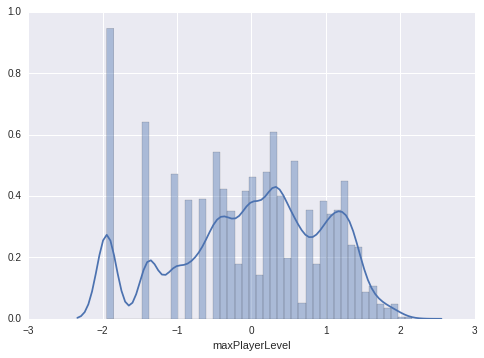

In [141]:
# слогарифмируем максимальный уровень
maxPlayerLevel_ln = x_train_original["maxPlayerLevel"].apply(lambda x: np.log(x+1))

_ = (maxPlayerLevel_ln - maxPlayerLevel_ln.mean())/maxPlayerLevel_ln.std()
sns.distplot(_)
_.describe()